In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from deepface import DeepFace

In [3]:
img_path1 = "../data/faces/bibek_face.jpg"
img_path2 = "../data/faces/bibek_face.jpg"

verification = DeepFace.verify(img_path1, img_path2)

26-02-28 19:06:27 - 🔗 vgg_face_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 to C:\Users\subhashk\.deepface\weights\vgg_face_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: C:\Users\subhashk\.deepface\weights\vgg_face_weights.h5
100%|██████████| 580M/580M [19:02<00:00, 508kB/s]  


In [4]:
face1_boundary = verification['facial_areas']['img1']
face2_boundary = verification['facial_areas']['img2']

face1_boundary, face2_boundary

({'x': 319, 'y': 295, 'w': 925, 'h': 925, 'left_eye': None, 'right_eye': None},
 {'x': 319, 'y': 295, 'w': 925, 'h': 925, 'left_eye': None, 'right_eye': None})

In [5]:
verification['verified']

True

In [ ]:
dfs = DeepFace.find(img_path=img_path1, db_path="../data/faces/")

26-02-28 20:07:33 - Found 2 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


26-02-28 20:07:35 - There are now 2 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
26-02-28 20:07:37 - Searching ../data/faces/bibek_face.jpg in 2 length datastore
26-02-28 20:07:37 - find function duration 4.8380420207977295 seconds


In [9]:
dfs

[                        identity                                      hash  \
 0   ../data/faces/bibek_face.jpg  c83d078b502813920e930a92b31a7048f0e76fe2   
 1  ../data/faces/bibek_face2.jpg  c11cd5d248d96147cfb782f4ea95a9c3a7624b54   
 
    target_x  target_y  target_w  target_h  threshold  source_x  source_y  \
 0       319       295       925       925       0.68       319       295   
 1       118        69       225       225       0.68       319       295   
 
    source_w  source_h  distance  confidence  
 0       925       925  0.123868       100.0  
 1       925       925  0.593886        58.7  ]

In [10]:
embedding_objs = DeepFace.represent(img_path=img_path1)
embedding = embedding_objs[0]["embedding"]
len(embedding)

4096

In [12]:
models = [
    "VGG-Face",
    "Facenet",
    "FaceNet512",
    "OpenFace",
    "DeepFace",
    "DeepID",
    "ArcFace",
    "Dlib",
    "SFace",
    "GhostFaceNet",
]

# face verification
result = DeepFace.verify(img_path1, img_path2, model_name=models[0])
print(f"Is the same person? {result['verified']}")

# face recognition
dfs = DeepFace.find(img_path=img_path1, db_path="../data/faces/", model_name=models[0])

#embeddings
embedding_objs = DeepFace.represent(img_path = img_path1, 
      model_name = models[0]
)

Is the same person? True
26-02-28 20:09:27 - Searching ../data/faces/bibek_face.jpg in 2 length datastore
26-02-28 20:09:28 - find function duration 2.2183289527893066 seconds


In [13]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

# face verification
resullt = DeepFace.verify(img_path1, img_path2, distance_metric=metrics[1])
print(f"Is the same person? {result['verified']}")  

Is the same person? True


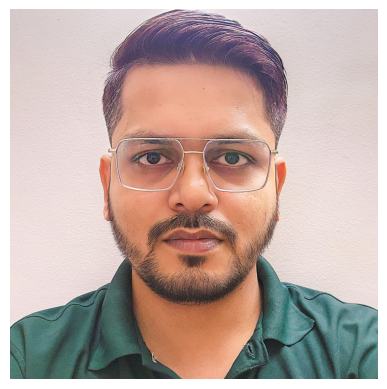

In [14]:
img1 =  cv2.imread(img_path1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.axis('off')
plt.show()

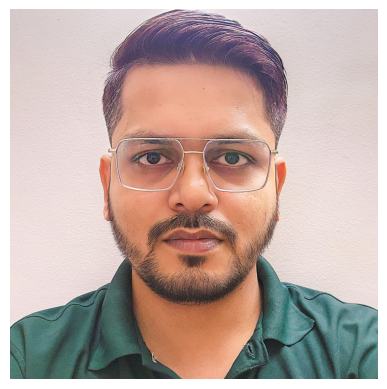

In [15]:
img2 =  cv2.imread(img_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.axis('off')
plt.show()